# Covid-19 visualization, prediction and forecasting



In [1]:
# Importing all the important libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')
%matplotlib inline

In [2]:
# loading all the three datasets

confirmed_cases = pd.read_csv("time_series_covid_19_confirmed.csv")

In [3]:
deaths_reported = pd.read_csv("time_series_covid_19_deaths.csv")

In [4]:
recovered_cases = pd.read_csv("time_series_covid_19_recovered.csv")

In [5]:
# display the head of the Dataset

confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,853,854,854,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,138,140,142,148,155,166,172,176,183,186


In [6]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,451,471,478,491,504,546,548,569,581,598
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,36,36,36,37,38,39,42,43,44,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,760,767,777,788,799,811,825,837,845,852
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,7,8,8,9,9,10


In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,781,781,789,789,791,792,792,792,792,796
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,61,61,64,64,64,64,66,66,77,77


In [8]:
# Extracting all the columns using the .keys() function.
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20',
       '6/19/20', '6/20/20', '6/21/20', '6/22/20'],
      dtype='object', length=157)

In [9]:
# Extracting only the dates columns that have information of confirmed,deaths and recovered cases.
confirmed =  confirmed_cases.loc[:, cols[4]:cols[-1]]

In [10]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [11]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [12]:
# Check the head of the outbreak cases.
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,0,0,0,0,0,0,0,0,0,0,...,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157
1,0,0,0,0,0,0,0,0,0,0,...,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995
2,0,0,0,0,0,0,0,0,0,0,...,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920
3,0,0,0,0,0,0,0,0,0,0,...,853,853,853,854,854,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,138,140,142,148,155,166,172,176,183,186


In [13]:
# Finding the total confirmed cases,death cases and the recovered cases and append them to an 4 empty lists.
# Also, calculate the total mortality rate which is the death sum/confirmed cases.

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [14]:
# Lets display each of the newly created variables
confirmed_sum

9098643

In [15]:
death_sum

472171

In [16]:
recovered_sum

4526333

In [17]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79525,
 80372,
 81346,
 82704,
 84070,
 85967,
 88325,
 90262,
 92795,
 95075,
 97844,
 101761,
 105782,
 109754,
 113536,
 118375,
 125704,
 130909,
 145204,
 156283,
 167022,
 181452,
 196917,
 216161,
 243084,
 272698,
 304844,
 337597,
 378381,
 418569,
 468155,
 530138,
 594178,
 661544,
 720695,
 783580,
 858317,
 933905,
 1014713,
 1097193,
 1177447,
 1251123,
 1322598,
 1397537,
 1481490,
 1567423,
 1659674,
 1737813,
 1836615,
 1906692,
 1977287,
 2057584,
 2153578,
 2242537,
 2316591,
 2399451,
 2472264,
 2546905,
 2622750,
 2711635,
 2799064,
 2884420,
 2958352,
 3027215,
 3101078,
 3176596,
 3261450,
 3349915,
 3432050,
 3511157,
 3587874,
 3668635,
 3760836,
 3851895,
 3945002,
 4030363,
 4108270,
 4184838,
 4268247,
 4353211

In [18]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [19]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79525],
       [  80372],
       [  81346],
       [  82704],
       [  84070],
       [  85967],
       [  88325],
       [  90262],
       [  92795],
       [  95075],
       [  97844],
       [ 101761],
       [ 105782],
       [ 109754],
       [ 113536],
       [ 118375],
       [ 125704],
       [ 130909],
       [ 145204],
       [ 156283],
       [ 167022],
       [ 181452],
       [ 1

In [21]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4610],
       [  4913],
       [  5411],
       [  5831],
       [  6471],
       [  7151],
       [  7957],
       [  8852],
       [  9958],
       [ 11439

In [22]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58359],
       [  60694],
       [  62493],
       [  64404],
       [  67002],
       [  68323],
       [  70250],
       [  72621],
       [  76031],
       [  78085],
       [  

In [23]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range (len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [24]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [25]:
# Convert all the integers into datetime for better visualization.
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [26]:
# For visualization with the latest data of the 22nd of june

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [27]:
# Find the list of unique countries
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [28]:
# The next line of code will basically calculate the total number of confirmed cases by each country.

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [29]:
# Number of cases per Country/Region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 2312302 cases
Brazil: 1106470 cases
Russia: 591465 cases
India: 440215 cases
United Kingdom: 306761 cases
Peru: 257447 cases
Chile: 246963 cases
Spain: 246504 cases
Italy: 238720 cases
Iran: 207525 cases
France: 197381 cases
Germany: 191768 cases
Turkey: 188897 cases
Mexico: 185122 cases
Pakistan: 185034 cases
Saudi Arabia: 161005 cases
Bangladesh: 115786 cases
Canada: 103418 cases
South Africa: 101590 cases
Qatar: 88403 cases
China: 84624 cases
Colombia: 71367 cases
Belgium: 60550 cases
Belarus: 59023 cases
Sweden: 58932 cases
Egypt: 56809 cases
Ecuador: 50640 cases
Netherlands: 49866 cases
Indonesia: 46845 cases
United Arab Emirates: 45303 cases
Argentina: 44931 cases
Singapore: 42313 cases
Kuwait: 40291 cases
Portugal: 39392 cases
Ukraine: 38056 cases
Iraq: 32676 cases
Poland: 32227 cases
Switzerland: 31310 cases
Oman: 31076 cases
Philippines: 30682 cases
Afghanistan: 29157 cases
Dominican Republic: 27370 cases
Panama: 26752 cases
Bolivia: 2

In [30]:
# Find the list of unique provinces
unique_provinces =  list(confirmed_cases['Province/State'].unique())

In [31]:
# Finding the number of confirmed cases per provinces,state or city.
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

In [32]:
# Number of cases per province/state/city
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 108 cases
New South Wales: 3150 cases
Northern Territory: 29 cases
Queensland: 1066 cases
South Australia: 440 cases
Tasmania: 228 cases
Victoria: 1864 cases
Western Australia: 607 cases
Alberta: 7736 cases
British Columbia: 2822 cases
Grand Princess: 13 cases
Manitoba: 314 cases
New Brunswick: 164 cases
Newfoundland and Labrador: 261 cases
Nova Scotia: 1061 cases
Ontario: 35418 cases
Prince Edward Island: 27 cases
Quebec: 54835 cases
Saskatchewan: 751 cases
Anhui: 991 cases
Beijing: 843 cases
Chongqing: 582 cases
Fujian: 363 cases
Gansu: 158 cases
Guangdong: 1634 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 171 cases
Hebei: 346 cases
Heilongjiang: 947 cases
Henan: 1276 cases
Hong Kong: 1161 cases
Hubei: 68135 cases
Hunan: 1019 cases
Inner Mongolia: 238 cases
Jiangsu: 654 cases
Jiangxi: 932 cases
Jilin: 155 cases
Liaoning: 154 cases
Macau: 45 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 317 cases
Shandong: 792 cases
Shanghai: 701 cases
Shanxi:

In [33]:
# Handling nan values if there is any,it is usually a float: float('nan')

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

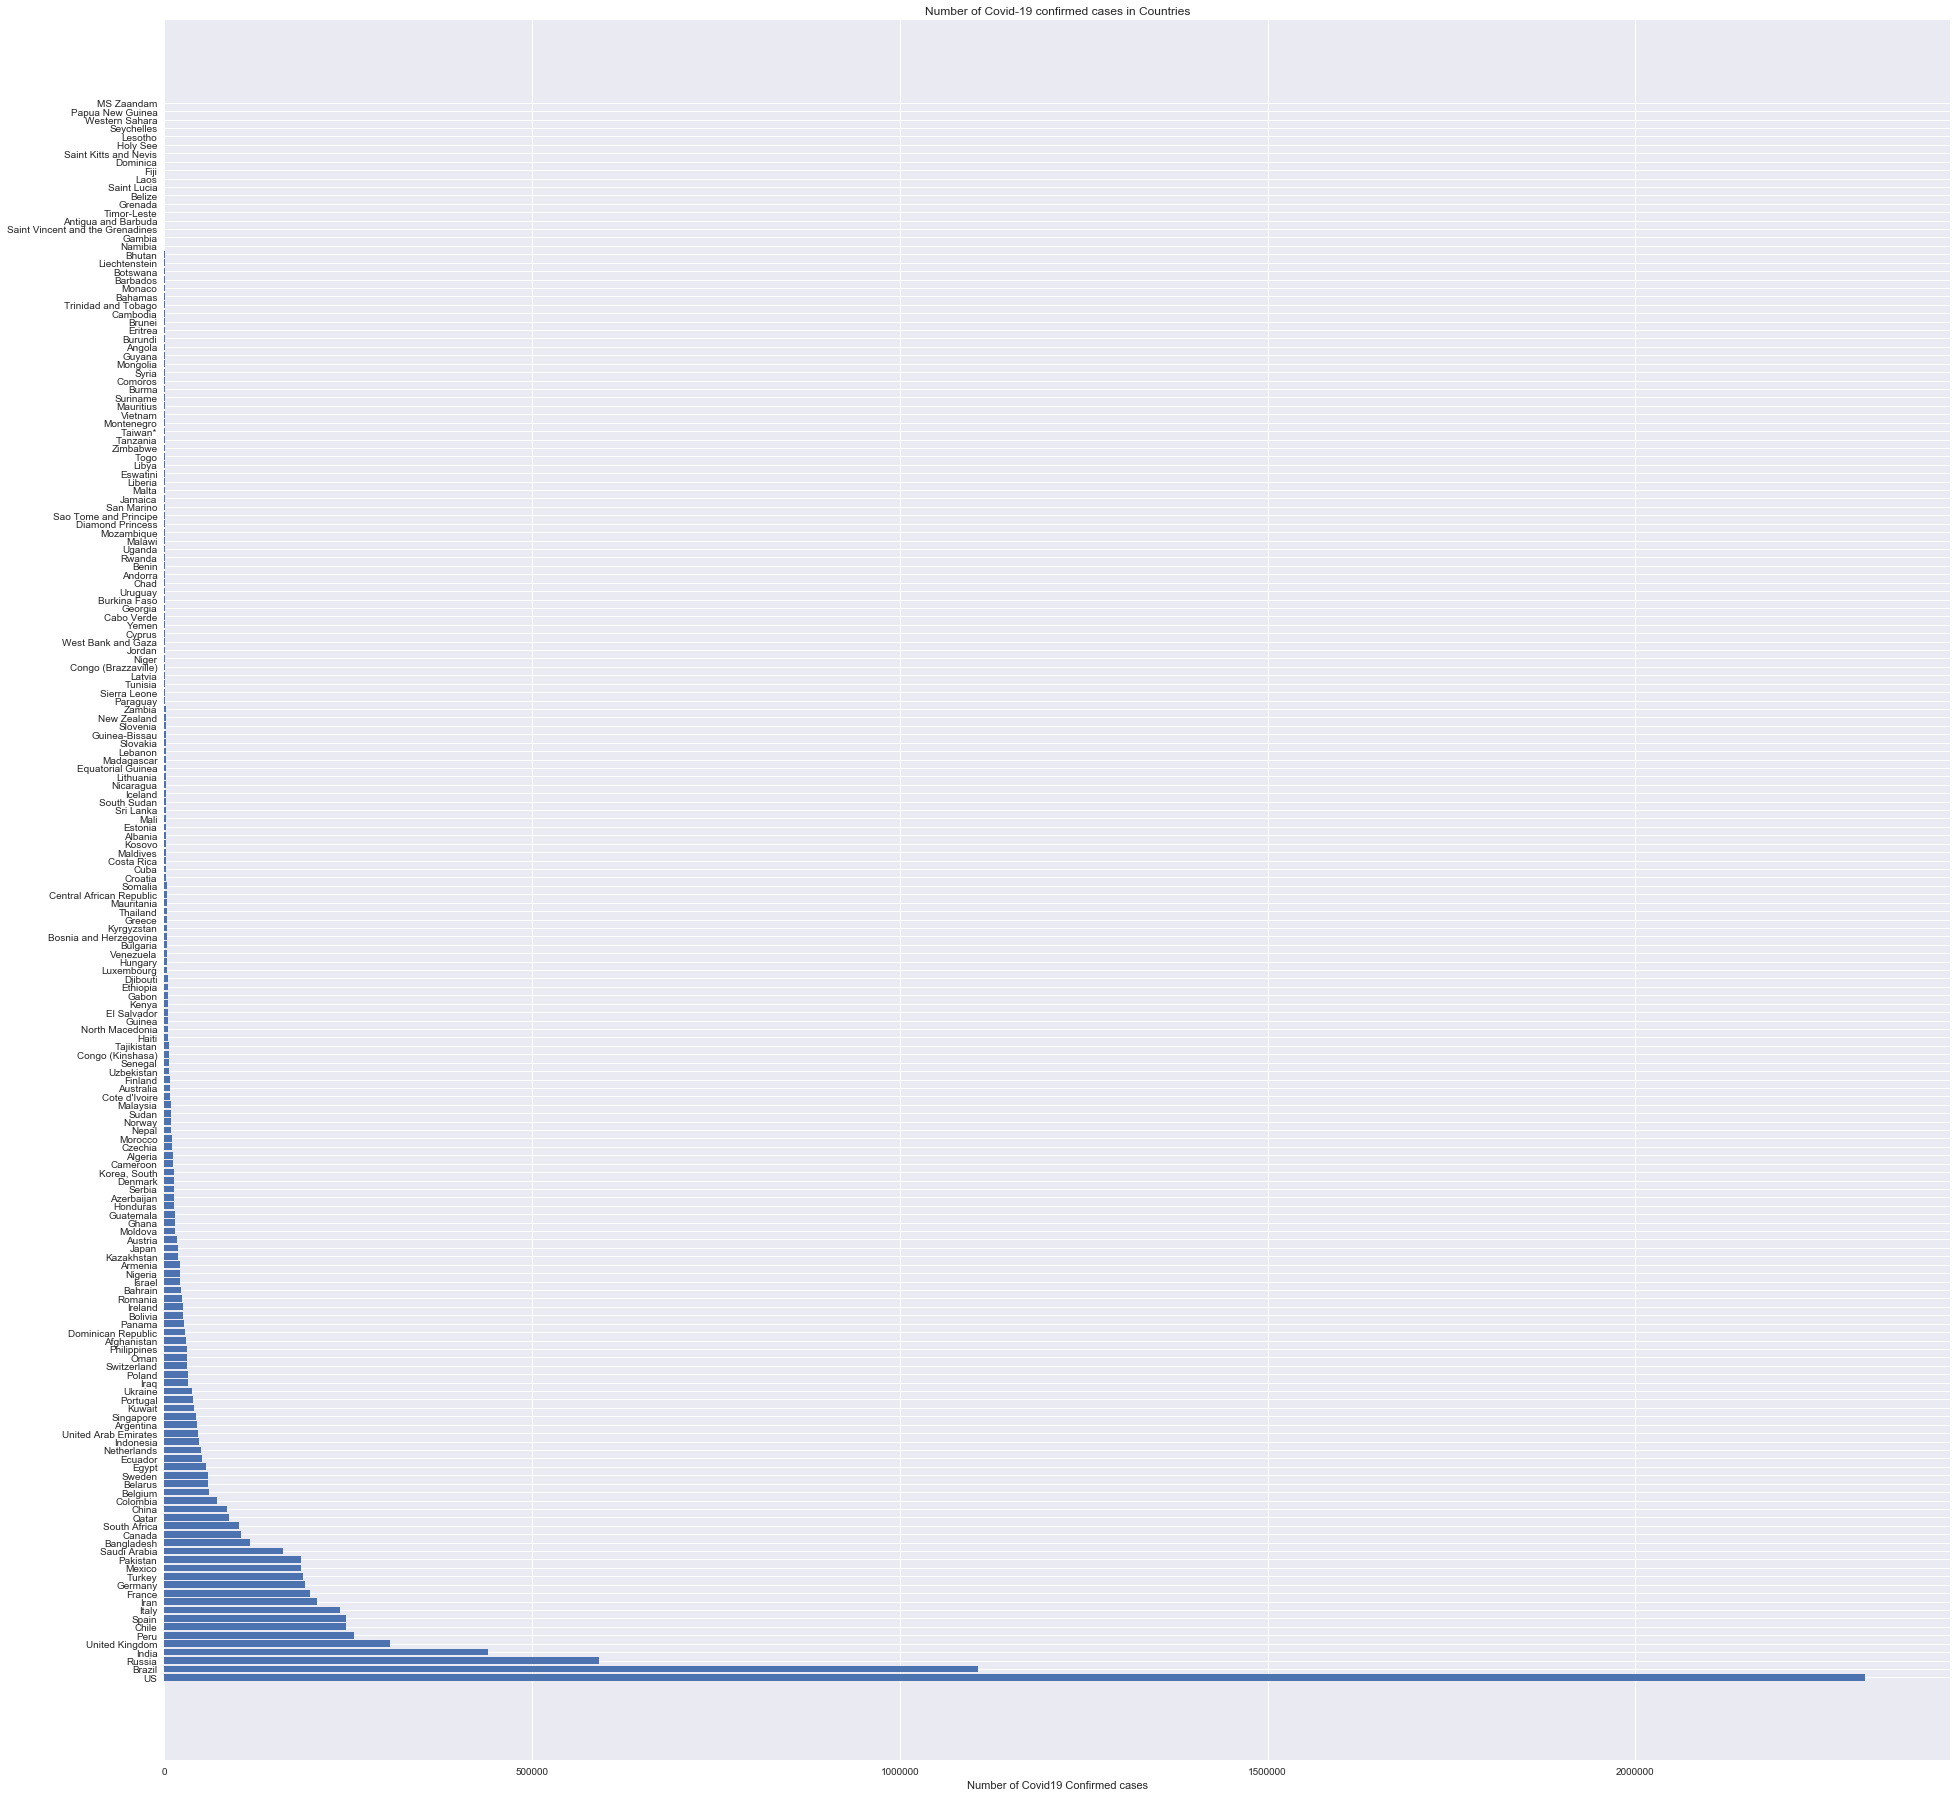

In [34]:
# Plot a bar graph to see the total confirmed cases across different countries.
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid-19 confirmed cases in Countries')
plt.xlabel('Number of Covid19 Confirmed cases')
plt.show()

In [35]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the  category named others
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

# Visual Representations (bar charts and pie charts)


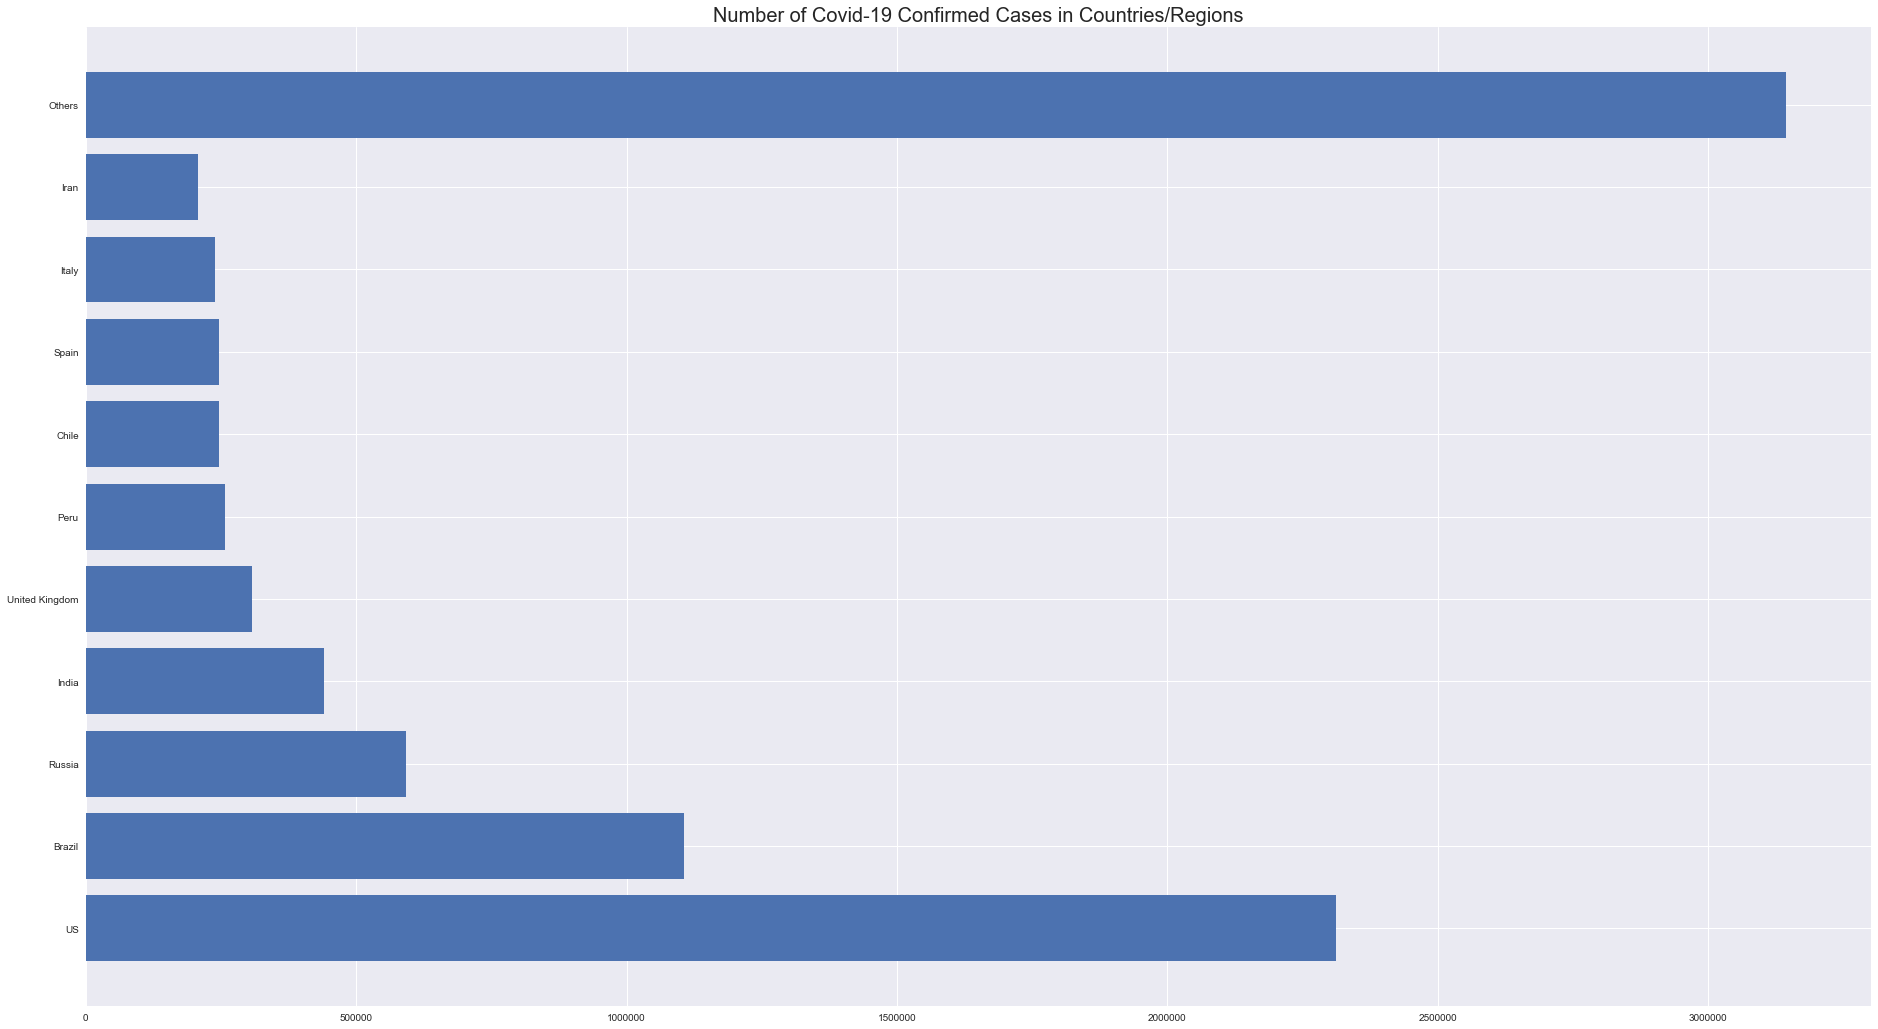

In [36]:
# Visualize the 10 Countries
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

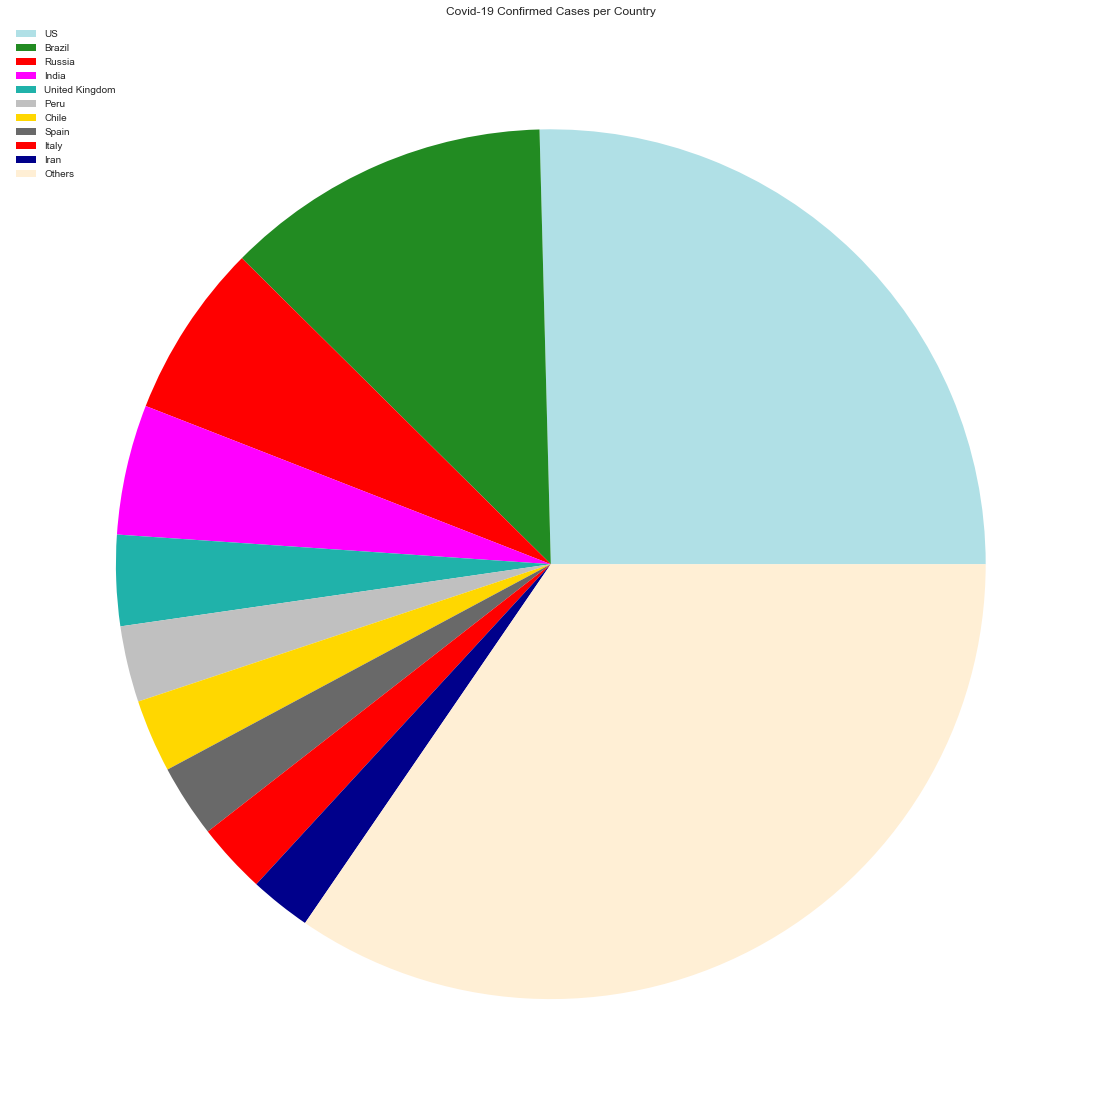

In [37]:
# Create a Pie chart to see the total confirmed cases in 10 different countries.

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [38]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [39]:
# Building the SVM Model
kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking= [True, False]
svm_grid = {'kernel': kernel,'C': c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}
svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:   25.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.6min finished
K:\conda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
K:\conda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='poly', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [40]:
# Finding the best parameters for the model
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 0.1}

In [41]:
# Finding the best estimator and predict the future forecast
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [42]:
# The values of best estimator
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
# Predicted values for all the dates
svm_pred

array([1.92184167e+03, 1.92490680e+03, 1.94636273e+03, 2.00460026e+03,
       2.11801018e+03, 2.30498329e+03, 2.58391039e+03, 2.97318228e+03,
       3.49118976e+03, 4.15632361e+03, 4.98697465e+03, 6.00153367e+03,
       7.21839146e+03, 8.65593883e+03, 1.03325666e+04, 1.22666655e+04,
       1.44766264e+04, 1.69808400e+04, 1.97976972e+04, 2.29455888e+04,
       2.64429055e+04, 3.03080382e+04, 3.45593777e+04, 3.92153146e+04,
       4.42942400e+04, 4.98145445e+04, 5.57946189e+04, 6.22528541e+04,
       6.92076409e+04, 7.66773699e+04, 8.46804322e+04, 9.32352183e+04,
       1.02360119e+05, 1.12073526e+05, 1.22393828e+05, 1.33339418e+05,
       1.44928686e+05, 1.57180023e+05, 1.70111819e+05, 1.83742465e+05,
       1.98090352e+05, 2.13173872e+05, 2.29011414e+05, 2.45621370e+05,
       2.63022130e+05, 2.81232085e+05, 3.00269626e+05, 3.20153143e+05,
       3.40901028e+05, 3.62531672e+05, 3.85063464e+05, 4.08514797e+05,
       4.32904060e+05, 4.58249644e+05, 4.84569941e+05, 5.11883341e+05,
      

MAE: 1090973.2364436
MSE: 1300741123700.0754


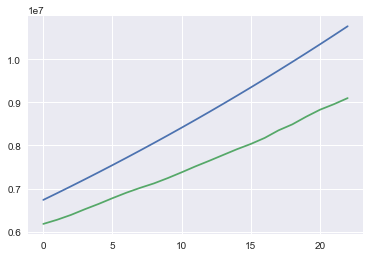

In [44]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

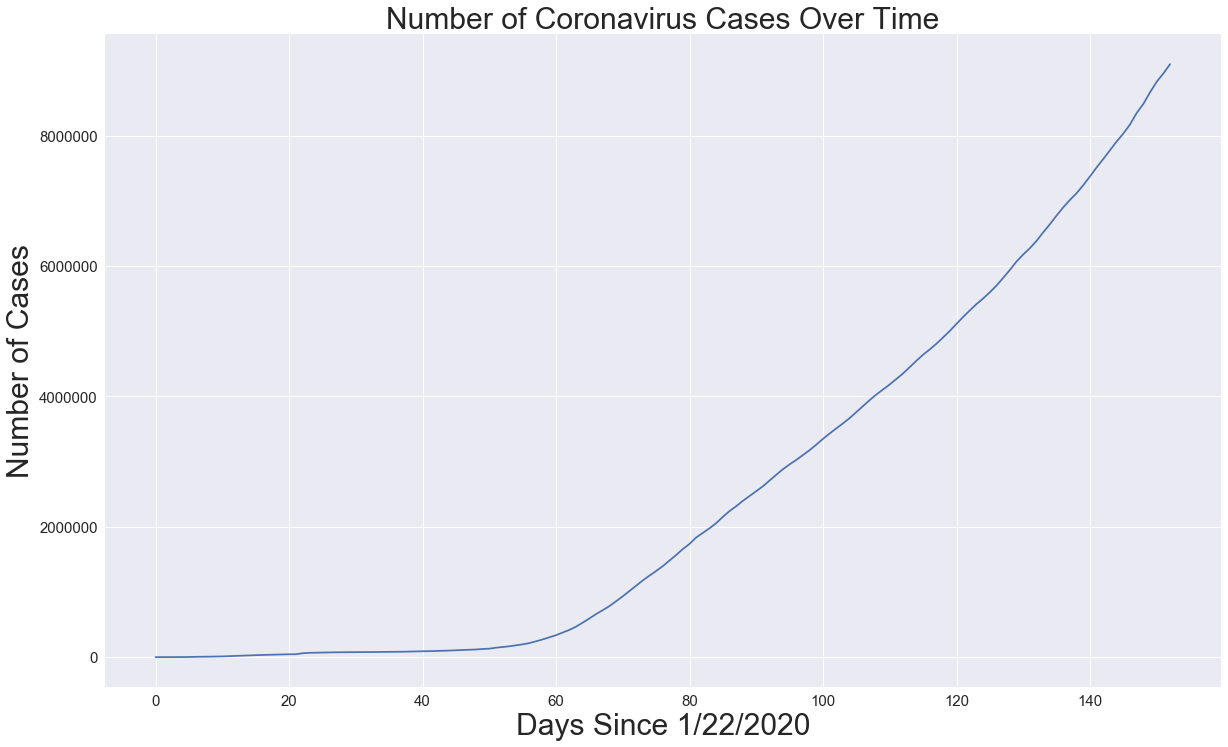

In [45]:
# Total number of coronavirus cases over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

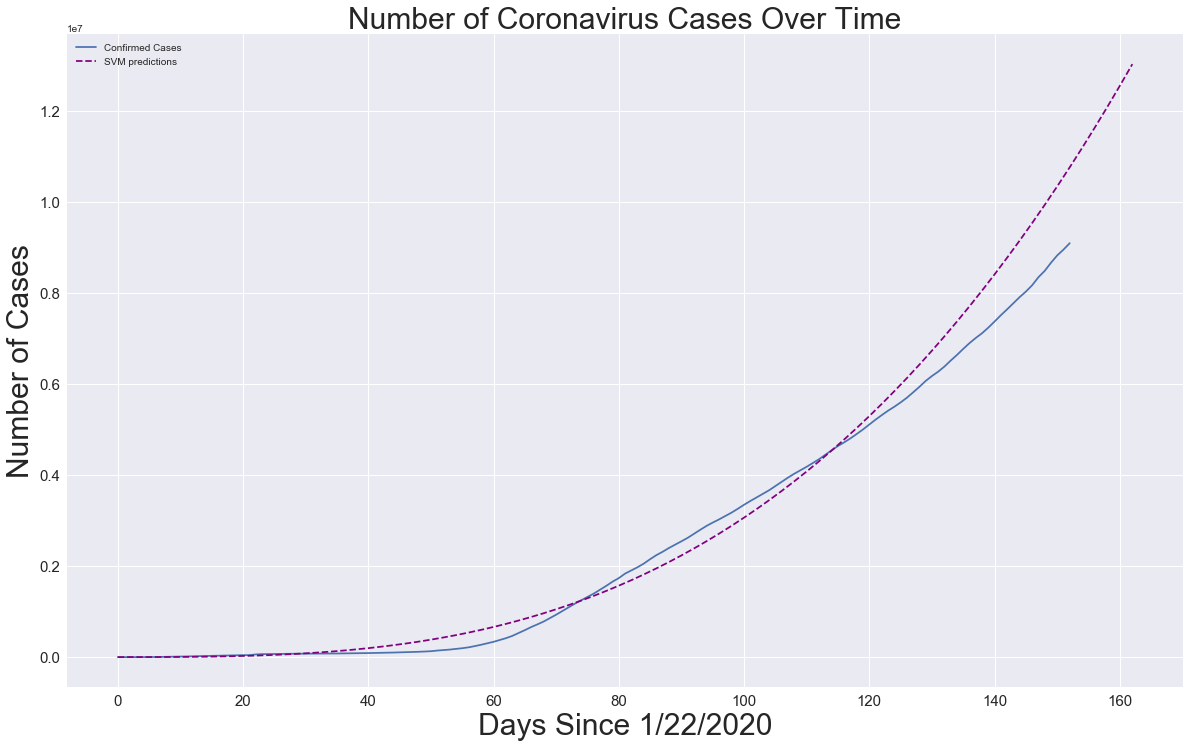

In [46]:
# Confirmed vs Predicted Cases
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [47]:
# Prediction for the next 10 days using SVM
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('06/23/2020', 10979931.628414027),
 ('06/24/2020', 11196596.682735316),
 ('06/25/2020', 11416093.921748988),
 ('06/26/2020', 11638441.734493129),
 ('06/27/2020', 11863658.510738246),
 ('06/28/2020', 12091762.639156215),
 ('06/29/2020', 12322772.516719691),
 ('06/30/2020', 12556706.531123988),
 ('07/01/2020', 12793583.072383754),
 ('07/02/2020', 13033420.534175746)}

In [48]:
# Using Linear Regression Model to make Predictions
linear_model = LinearRegression(normalize = True,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 2376440.8069835715
MSE: 5979711806506.45


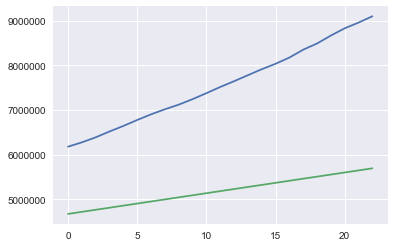

In [49]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

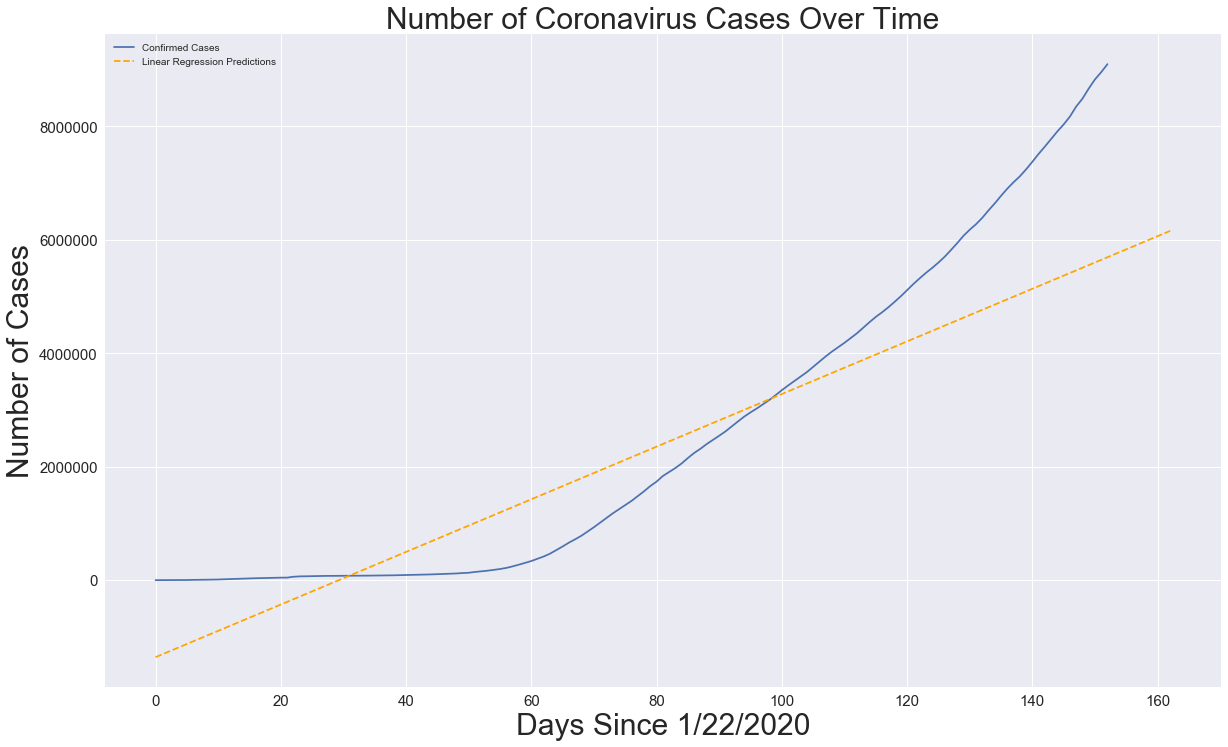

In [50]:
# Graphing the number of confirmed cases, deaths, active cases, and the mortality rate over time, as well as the number of recoveries
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [51]:
# Prediction for the next 10 days using Linear Regression
print('Linear regression future predictions:')
print(future_forcast_dates[-10:],linear_pred[-10:])

Linear regression future predictions:
['06/23/2020', '06/24/2020', '06/25/2020', '06/26/2020', '06/27/2020', '06/28/2020', '06/29/2020', '06/30/2020', '07/01/2020', '07/02/2020'] [[5740468.66824073]
 [5786857.62450942]
 [5833246.58077811]
 [5879635.5370468 ]
 [5926024.49331549]
 [5972413.44958418]
 [6018802.40585287]
 [6065191.36212156]
 [6111580.31839026]
 [6157969.27465895]]


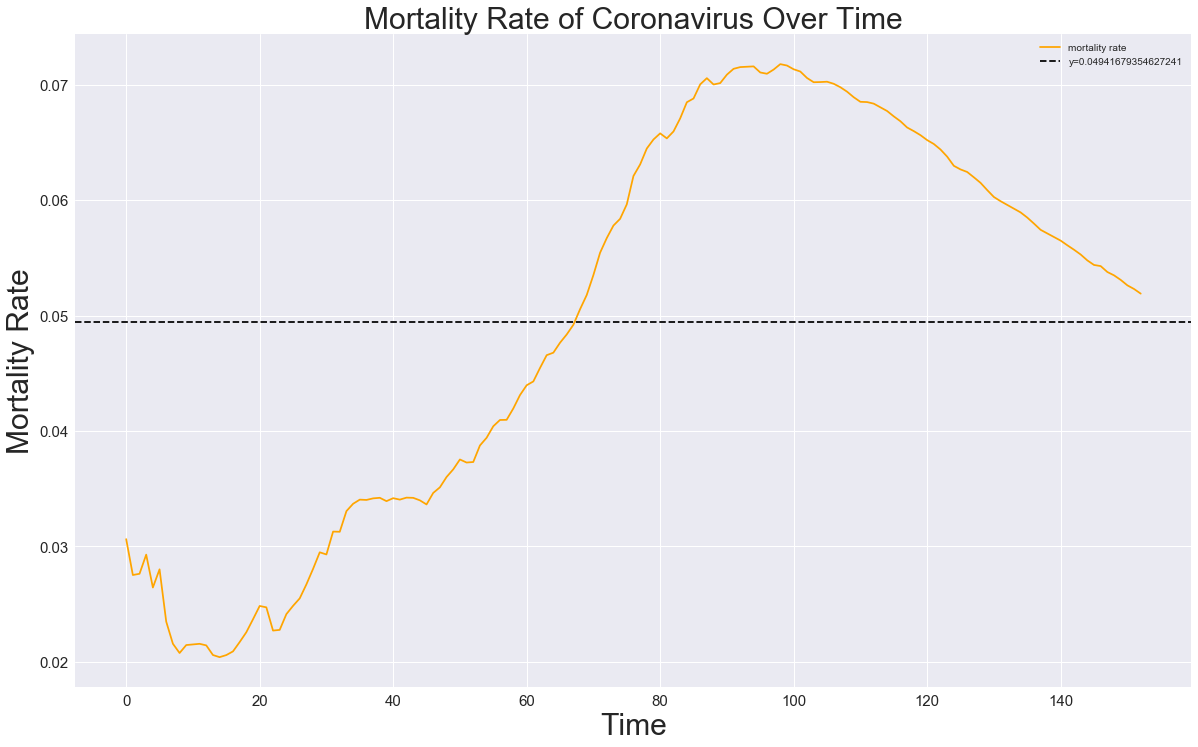

In [52]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

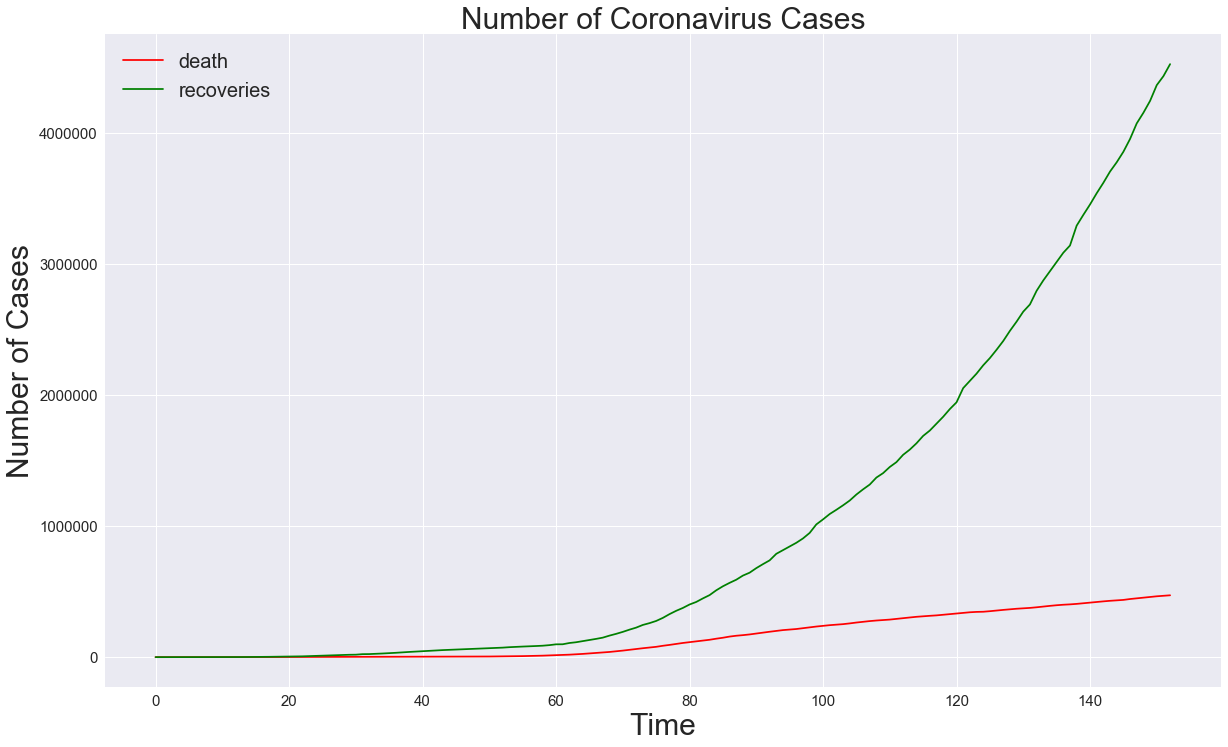

In [53]:
# Number of Coronavirus cases recovered vs the number of deaths
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()